In [953]:
import pycuda.autoinit
import pycuda.driver as drv
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

from pycuda.compiler import SourceModule
with open("./primitives.cu", "r") as f:
    mod = SourceModule(f.read())

In [954]:
mod

In [955]:
cphase = mod.get_function("cphase")
hadamard = mod.get_function("hadamard")
amp_ph_damping = mod.get_function("amp_ph_damping")

In [979]:
x = (np.random.random((32*32,32*32))+2 )*(1+1j)
#x[:,:] = 1
x = x.astype(np.complex128)
x = x/np.trace(x)

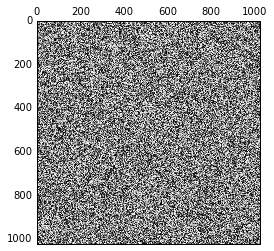

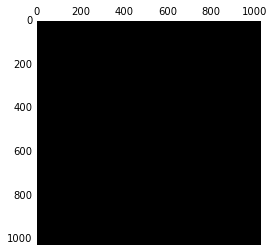

In [980]:
plt.matshow(x.real, cmap="gray")
plt.matshow(x.imag, cmap="gray")

In [981]:
xg = drv.to_device(x)

In [982]:
np.trace(x)

(1+0j)

In [983]:
cphase(xg, np.uint32((1<<9) | (1<<8)), block=(32,32,1), grid=(32,32,1))

In [976]:
hadamard(xg, np.uint32(1<<9), np.float32(0.5), block=(32,32,1), grid=(32,32,1))

In [672]:
hadamard(xg, np.uint32(1<<9), np.float32(0.5), block=(32,32,1), grid=(32,32,1))
cphase(xg, np.uint32((1<<9) | (1<<8)), block=(32,32,1), grid=(32,32,1))
hadamard(xg, np.uint32(1<<9), np.float32(0.5), block=(32,32,1), grid=(32,32,1))


In [943]:
gamma = 0.1
lamda = 0.0

gamma = np.float64(gamma)
s1mgamma = np.float64(np.sqrt(1 - gamma))
s1mlambda = np.float64(np.sqrt(1 - lamda))

for i in range(1000):
    amp_ph_damping(xg, np.uint32(1<<0), gamma, s1mgamma, s1mlambda, block=(32,32,1), grid=(32,32,1))

In [950]:
%timeit cphase(xg, np.uint32((1<<9) | (1<<6)), block=(32,32,1), grid=(32,32,1))

10000 loops, best of 3: 135 µs per loop


In [949]:
%timeit hadamard(xg, np.uint32(1<<9), np.float64(0.5), block=(32,32,1), grid=(32,32,1))


10000 loops, best of 3: 410 µs per loop


In [984]:
xp = drv.from_device(xg, (32*32,32*32), np.complex128)

In [985]:
np.trace(xp)

(1+0j)

In [952]:
%timeit amp_ph_damping(xg, np.uint32(1<<0), gamma, s1mgamma, s1mlambda, block=(32,32,1), grid=(32,32,1))

10000 loops, best of 3: 413 µs per loop


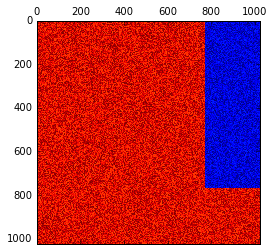

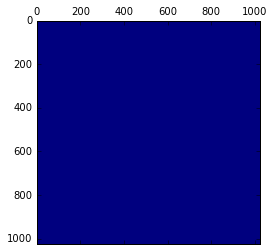

In [986]:
plt.matshow(xp.real)
plt.matshow(xp.imag)

In [987]:
import pycuda.gpuarray as ga

In [989]:
x = ga.arange(20, dtype=np.float64)

In [992]:
s = ga.sum(x)

In [995]:
x

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])